<a href="https://colab.research.google.com/github/Pratikshya49/Concepts-and-Technologies-of-AI/blob/main/Worksheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 3.1)
# Problem 1:


import os
print(os.getcwd())
from google.colab import files
uploaded = files.upload()


import pandas as pd

# 1. Load the provided dataset
df = pd.read_csv("bank.csv")

# 2. Inspecting the DataFrame
print("----- DATAFRAME INFO -----")
print(df.info())                        # Data type information

# (a) Columns with dtype = object
object_cols = df.select_dtypes(include='object').columns
print("\n----- OBJECT COLUMNS -----")
print(object_cols)

# (b) Unique values of object columns
print("\n----- UNIQUE VALUES IN OBJECT COLUMNS -----")
for col in object_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("------------------------------------------------")

# (c) Number of null values in each column
print("\n----- NULL VALUES IN EACH COLUMN -----")
print(df.isnull().sum())

# 3. Drop object columns and save new DataFrame
df_numeric = df.drop(columns=object_cols)

# Save numeric DataFrame to CSV file
df_numeric.to_csv("banknumericdata.csv", index=False)
print("\nNew CSV file 'banknumericdata.csv' created successfully!")

# 4. Read the new CSV and show summary statistics
df_new = pd.read_csv("banknumericdata.csv")

print("\n----- SUMMARY STATISTICS OF NUMERIC DATA -----")
print(df_new.describe())

/content


Saving bank.csv to bank.csv
----- DATAFRAME INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

----- OBJECT COLUMNS -----
Index(['job

In [ ]:
# 3.1)
# Problem 2:

import os
print(os.getcwd())
from google.colab import files
uploaded = files.upload()

import pandas as pd

#1) Load dataset
df = pd.read_csv("medical_students_dataset.csv")

# Display first 5 rows
df.head()



#2) Dataset information
df.info()

# Count missing values per column
df.isnull().sum()




# 3)a. Numeric columns → Median imputation
# Reason : Median is robust against outliners in numeric medical data
numeric_cols = ['Age', 'Height', 'Weight', 'BMI',
                'Temperature', 'Heart Rate', 'Blood Pressure',
                'Cholesterol']

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# b. Categorical columns → Mode imputation
# Reason : Mode replicate missing category with the most frequent value
categorical_cols = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# c. Student ID special handling
# Reaon : Insure all rows have unique and sequential IDs
df['Student ID'].fillna(method='ffill', inplace=True)



# 4) Duplicate checking and removal
print("\nDuplicate rows before removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate rows after removal:", df.duplicated().sum())

# Final : Show final dataset info
print("\n--- Missing Values After Imputation ---")
print(df.isnull().sum())

/content


Saving medical_students_dataset.csv to medical_students_dataset (3).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


/tmp/ipython-input-68318877.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-68318877.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


Duplicate rows before removal: 12842
Duplicate rows after removal: 0

--- Missing Values After Imputation ---
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [ ]:
# 3.2)
# Problem 1:
import os
print(os.getcwd())
from google.colab import files
uploaded = files.upload()

import pandas as pd

#1) Load dataset
df = pd.read_csv("Titanic-Dataset.csv")


# 2️⃣ Subset the DataFrame for required columns
subset_cols = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
df_subset = df[subset_cols]

# 3️⃣ Retain only rows where Pclass == 1 (first-class passengers)
df_first_class = df_subset[df_subset['Pclass'] == 1]

# 4️⃣ Calculate statistics for 'Fare'
fare_mean = df_first_class['Fare'].mean()
fare_median = df_first_class['Fare'].median()
fare_max = df_first_class['Fare'].max()
fare_min = df_first_class['Fare'].min()

# 5️⃣ Display the results
print("Statistics of 'Fare' for first-class passengers:")
print(f"Mean Fare   : {fare_mean}")
print(f"Median Fare : {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")



# Problem 2:
# 1️⃣ Check number of null values in 'Age' column
null_age_count = df_first_class['Age'].isnull().sum()
print(f"Number of null values in 'Age': {null_age_count}")

# 2️⃣ Drop rows with null values in 'Age'
df_first_class_clean = df_first_class.dropna(subset=['Age'])

# 3️⃣ Verify that null values are removed
null_age_count_after = df_first_class_clean['Age'].isnull().sum()
print(f"Number of null values in 'Age' after dropping: {null_age_count_after}")


# Problem 3:
# 2️⃣ Use one-hot encoding for 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# 3️⃣ Add the new columns to the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# 4️⃣ Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

# 5️⃣ Display first few rows to verify changes
print(df.head())


/content


Saving Titanic-Dataset.csv to Titanic-Dataset (3).csv
Statistics of 'Fare' for first-class passengers:
Mean Fare   : 84.1546875
Median Fare : 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0
Number of null values in 'Age': 30
Number of null values in 'Age' after dropping: 0
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Far

/content


Saving Titanic-Dataset.csv to Titanic-Dataset (5).csv
Mean survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


/tmp/ipython-input-116148030.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None)


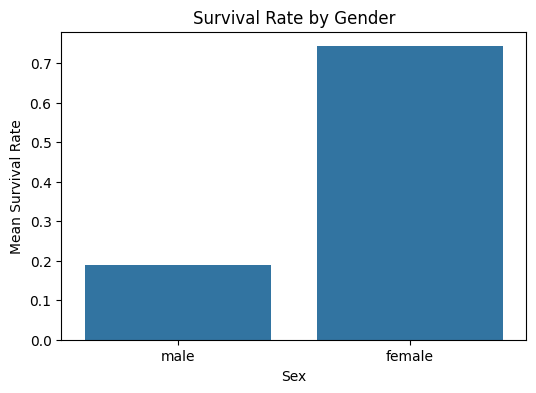

In [ ]:
# 3.2
# Problem 4:
import os
print(os.getcwd())
from google.colab import files
uploaded = files.upload()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

# 2️⃣ Calculate mean survival rates for each gender
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Mean survival rate by Sex:")
print(mean_survival_by_sex)

# 3️⃣ Visualize survival distribution by gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title("Survival Rate by Gender")
plt.ylabel("Mean Survival Rate")
plt.show()


/content


Saving Titanic-Dataset.csv to Titanic-Dataset (6).csv


/tmp/ipython-input-3871488696.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df_clean, ci=None)


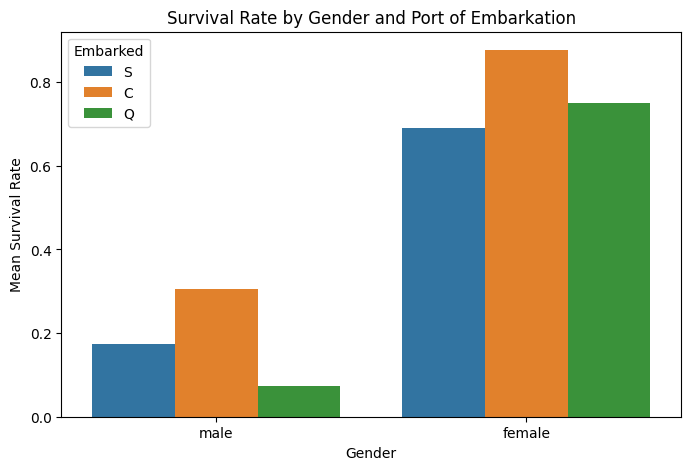

In [ ]:
# 3.2
# Problem 5:
import os
print(os.getcwd())
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load Titanic dataset (if not already loaded)
df = pd.read_csv("Titanic-Dataset.csv")

# 2️⃣ Drop rows with missing 'Embarked' or 'Sex' values
df_clean = df.dropna(subset=['Embarked', 'Sex'])

# 3️⃣ Create a grouped bar plot of survival by Sex and Embarked
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df_clean, ci=None)
plt.title("Survival Rate by Gender and Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Gender")
plt.legend(title="Embarked")
plt.show()

/content


Saving Titanic-Dataset.csv to Titanic-Dataset (7).csv
      AgeGroup  Pclass  Survived
0   Very Young       1  0.809524
1   Very Young       2  0.742857
2   Very Young       3  0.333333
3        Young       1  0.761905
4        Young       2  0.400000
5        Young       3  0.197674
6       Middle       1  0.666667
7       Middle       2  0.416667
8       Middle       3  0.283582
9          Old       1  0.777778
10         Old       2  0.461538
11         Old       3  0.166667
12    Very Old       1  0.506667
13    Very Old       2  0.363636
14    Very Old       3  0.088235


/tmp/ipython-input-640375952.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AgeGroup'] = pd.qcut(df_clean['Age'], 5, labels=['Very Young','Young','Middle','Old','Very Old'])
/tmp/ipython-input-640375952.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_class = df_clean.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().reset_index()


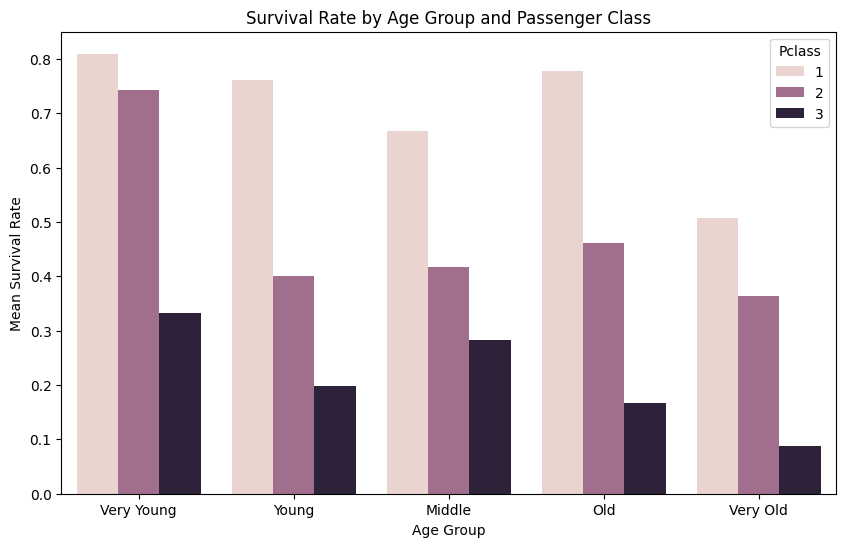

In [ ]:
# 3.2
# Problem 6:
import os
print(os.getcwd())
from google.colab import files
uploaded = files.upload()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

# 2️⃣ Drop rows with missing 'Age' or 'Pclass'
df_clean = df.dropna(subset=['Age', 'Pclass'])

# 3️⃣ Break 'Age' into 5 quantiles
df_clean['AgeGroup'] = pd.qcut(df_clean['Age'], 5, labels=['Very Young','Young','Middle','Old','Very Old'])

# 4️⃣ Calculate mean survival rate by AgeGroup and Pclass
survival_by_age_class = df_clean.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().reset_index()
print(survival_by_age_class)

# 5️⃣ Visualize using a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=survival_by_age_class)
plt.title("Survival Rate by Age Group and Passenger Class")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Age Group")
plt.legend(title="Pclass")
plt.show()
